Using Colab cache for faster access to the 'attendance-sheet-data-set-for-university' dataset.
Dataset downloaded to: /kaggle/input/attendance-sheet-data-set-for-university

 MINOR PROJECT STATISTICS 
Total Students:    33
Total Sessions:    8
Overall Avg:       87.50%
Best Attendance:   100.00% on 09-Jan
Lowest Attendance: 63.64% on 23-Jan


/tmp/ipython-input-3808536970.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_attendance = df[date_cols].replace({'P': 1, 'A': 0, ' ': 0}).fillna(0)


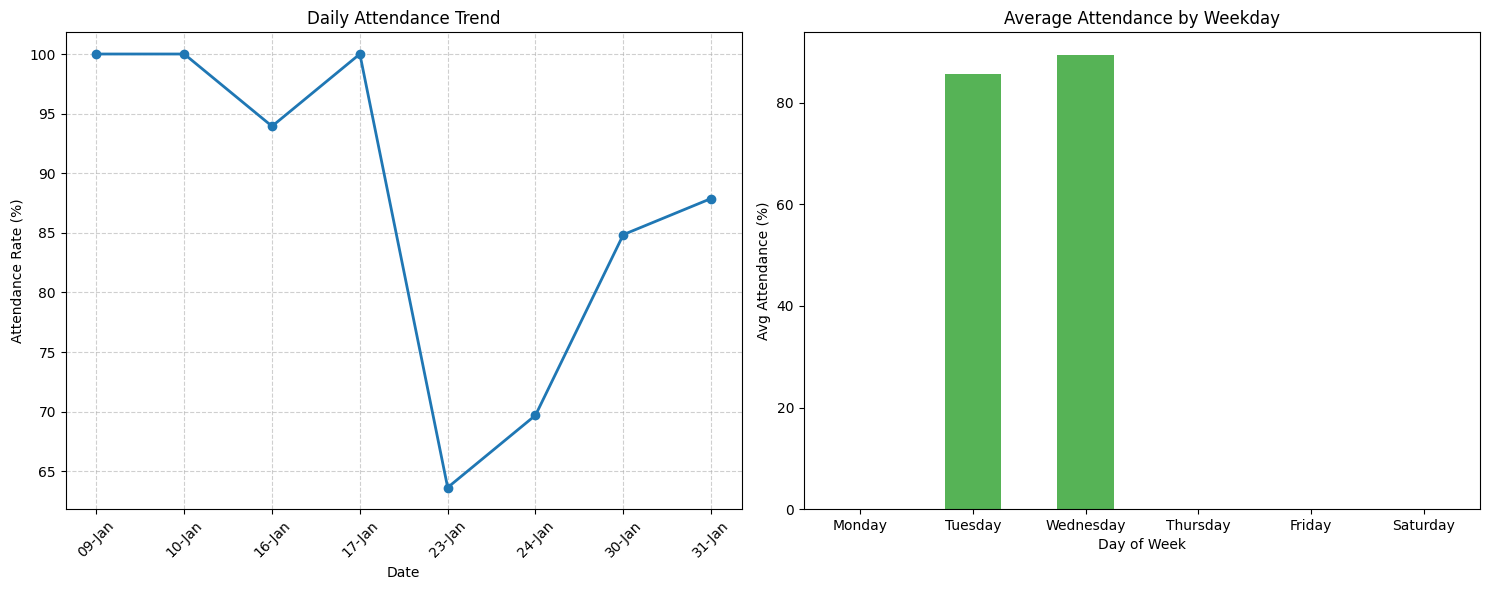

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import os

# 1. DOWNLOAD DATASET
path = kagglehub.dataset_download("ahmedaliraja/attendance-sheet-data-set-for-university")
print("Dataset downloaded to:", path)

# 2. LOCATE THE FILE
csv_file_path = os.path.join(path, "AI_csv.csv")

# 3. LOAD DATA
df = pd.read_csv(csv_file_path, skiprows=[1])

# 4. CLEAN ATTENDANCE DATA
# Identify columns that represent dates
date_cols = [c for c in df.columns if '-' in c]

# Convert 'P' to 1 and 'A' (or spaces) to 0 using built-in replace
# We fill empty values (NaN) with 0
numeric_attendance = df[date_cols].replace({'P': 1, 'A': 0, ' ': 0}).fillna(0)

# 5. CALCULATE DAILY TRENDS
# Calculate the percentage of students present for each date column
daily_attendance = numeric_attendance.mean() * 100

# 6. CALCULATE WEEKLY PATTERNS
# Convert the date strings into actual datetime objects to find the day names
pattern_df = pd.DataFrame({'Rate': daily_attendance.values}, index=daily_attendance.index)
pattern_df.index = pd.to_datetime(pattern_df.index + '-2024', format='%d-%b-%Y')
pattern_df['Day'] = pattern_df.index.day_name()

# Group by the Day and order them correctly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekly_pattern = pattern_df.groupby('Day')['Rate'].mean().reindex(day_order)

# 7. GENERATE STATISTICS
print("\n" + "="*30)
print(" MINOR PROJECT STATISTICS ")
print("="*30)
print(f"Total Students:    {len(df)}")
print(f"Total Sessions:    {len(date_cols)}")
print(f"Overall Avg:       {daily_attendance.mean():.2f}%")
print(f"Best Attendance:   {daily_attendance.max():.2f}% on {daily_attendance.idxmax()}")
print(f"Lowest Attendance: {daily_attendance.min():.2f}% on {daily_attendance.idxmin()}")
print("="*30)

# 8. VISUALIZATION
plt.figure(figsize=(15, 6))

# Subplot 1: Daily Attendance Line Plot
plt.subplot(1, 2, 1)
plt.plot(daily_attendance.index, daily_attendance.values, marker='o', color='tab:blue', linewidth=2)
plt.title('Daily Attendance Trend', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Attendance Rate (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot 2: Weekly Pattern Bar Plot
plt.subplot(1, 2, 2)
weekly_pattern.plot(kind='bar', color='tab:green', alpha=0.8)
plt.title('Average Attendance by Weekday', fontsize=12)
plt.xlabel('Day of Week')
plt.ylabel('Avg Attendance (%)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()